In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/RecHash

/content/drive/.shortcut-targets-by-id/1RbfabtwaBLjUw91iLjZ9z3eugQIdP4hb/RecHash


In [ ]:
import numpy as np
import json
from evaluate_old import evaluate
from utility_old import *
import pandas as pd

# Evaluate

In [ ]:
dataset = 'movielens'
setting = '2core'
pred_dir = "predictions/%s/" %(dataset)
input_dir = "dataset/%s/%s/" % (dataset, setting)
result_dir = 'results/%s/' % dataset

dat = 'ml' if dataset == 'movielens' else 'az'

metapaths = ['UPUP', 'UPGP']

block_metapaths = ['Uh(U)_BU', 'UPh(P)_BU', 'UTh(T)_BU', 'UPTh(T)_BU', 'UPUh(U)_BU',  'UTPh(P)_BU']

rw_metapaths = [ 'RW_UP_0.6sample_5epo_6bit_1r_BU',
                 'RW_UP_0.6sample_10epo_8bit_1r_BU',  
                 'RW_UP_0.6sample_10epo_6bit_1r_BU',
                 'RW_UP_0.6sample_5epo_8bit_1r_BU', 

                 'RW_UPT_0.6sample_5epo_6bit_1r_BU',
                 'RW_UPT_0.6sample_5epo_8bit_1r_BU', 
                 'RW_UPT_0.6sample_10epo_8bit_1r_BU',
                 'RW_UPT_0.6sample_10epo_16bit_1r_BU', 
                 'RW_UPT_0.6sample_5epo_16bit_1r_BU',
                 'RW_UPT_0.6sample_10epo_6bit_1r_BU',
 
                 'RW_UPU_0.6sample_10epo_16bit_1r_BU',
                 'RW_UPU_0.6sample_5epo_16bit_1r_BU',
                 'RW_UPU_0.6sample_10epo_6bit_1r_BU',
                 'RW_UPU_0.6sample_10epo_8bit_1r_BU',
                 'RW_UPU_0.6sample_5epo_6bit_1r_BU',

                 'RW_UPTP_0.6sample_5epo_8bit_1r_BU',
                 'RW_UPTP_0.6sample_5epo_16bit_1r_BU',
                 'RW_UPTP_0.6sample_10epo_8bit_1r_BU',
                 'RW_UPTP_0.6sample_5epo_6bit_1r_BU',
                 'RW_UPTP_0.6sample_10epo_16bit_1r_BU',
                 'RW_UPTP_0.6sample_10epo_6bit_1r_BU',

                 'RW_UPUP_0.3sample_3epo_6bit_1r_BU',
                 'RW_UPUP_0.6sample_5epo_8bit_1r_BU',
                 'RW_UPUP_0.6sample_5epo_6bit_1r_BU',
                 'RW_UPUP_0.6sample_3epo_16bit_1r_BU',
                 'RW_UPUP_0.6sample_5epo_16bit_1r_BU',
                 'RW_UPUP_0.6sample_3epo_8bit_1r_BU',
                 'RW_UPUP_0.6sample_3epo_6bit_1r_BU',

                 'RW_UPUT_0.6sample_3epo_6bit_1r_BU',
                 'RW_UPUT_0.6sample_3epo_8bit_1r_BU',
                 'RW_UPUT_0.6sample_3epo_16bit_1r_BU',

                 'RW_UPTU_0.6sample_5epo_6bit_1r_BU',
                 'RW_UPTU_0.6sample_10epo_16bit_1r_BU',
                 'RW_UPTU_0.6sample_10epo_6bit_1r_BU',
                 'RW_UPTU_0.6sample_5epo_16bit_1r_BU',
                 'RW_UPTU_0.6sample_10epo_8bit_1r_BU',
                 'RW_UPTU_0.6sample_5epo_8bit_1r_BU',     

                 'RW_UPUPUP_0.6sample_3epo_6bit_1r_BU']

nh_metapaths = [ 'RH_UP_8bit_1r_BU',
                 'RH_UP_6bit_1r_BU',
                 'RH_UP_16bit_1r_BU',

                 'RH_UPT_8bit_1r_BU',
                 'RH_UPT_6bit_1r_BU',
                 'RH_UPT_16bit_1r_BU',

                 'RH_UPU_8bit_1r_BU',
                 'RH_UPU_6bit_1r_BU',
                 'RH_UPU_16bit_1r_BU',

                 'RH_UPTP_8bit_1r_BU',
                 'RH_UPTP_6bit_1r_BU',
                 'RH_UPTP_16bit_1r_BU',

                 'RH_UPUP_8bit_1r_BU',
                 'RH_UPUP_6bit_1r_BU',
                 'RH_UPUP_16bit_1r_BU',

                 'RH_UPTU_8bit_1r_BU',
                 'RH_UPTU_6bit_1r_BU',
                 'RH_UPTU_16bit_1r_BU',

                 'RH_UPUPUP_8bit_1r_BU',
                 'RH_UPUPUP_6bit_1r_BU',
                 'RH_UPUPUP_16bit_1r_BU']


                


In [ ]:
# All prediction files 

pred_files = ["userknn_ml_2core_nb10.json", 
              "bpr_none_1_ml_emb300_2core.json",
              "vbpr_none_1_ml_emb300_2core.json"] + \
             ["vkg_ml_%s_nw100_nb10_emb300_2core.json"%(m) for m in metapaths]+\
             ["RN_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in nh_metapaths] +\
             ["RH_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in block_metapaths] +\
             ["SRH_user_based_bm%s_ml_UserItemMatrix_nw100_nb10_emb300_2core.json"%bm for bm in rw_metapaths] +\
             ["ME_user_based_bm%s_ml_%s_nw100_nb10_emb300_2core.json"%(bm,m) for bm in block_metapaths for m in metapaths]   


In [ ]:
# According labels for each prediction file

labels = ["CF", 'BPR', 'VBPR'] + \
             ['ME %s'%(m) for m in metapaths]  +\
             ['RN %s'%bm for bm in nh_metapaths] +\
             ['RH %s'%bm for bm in block_metapaths] +\
             ['SRH %s'%bm for bm in rw_metapaths] +\
             ['ME %s %s'%(bm,m) for bm in block_metapaths for m in metapaths] 

In [ ]:
with open(input_dir + "train.json", 'r') as fp:
    train_set = json.load(fp)
with open(input_dir + "test.json", 'r') as fp:
    test_set = json.load(fp)
with open(input_dir + "item.json", 'r') as fp:
    item_data = json.load(fp)
all_users = list(train_set.keys())
all_items = list(item_data.keys())

In [ ]:
df = None
try:
    os.mkdir(result_dir + "%s/"%th)
except:
    pass
    
assert len(pred_files) == len(labels)
    
for label, pred_file in zip(labels, pred_files): 
        
    result_file = result_dir + pred_file.replace('.json', '.csv') 
        
    if os.path.exists(result_file):
        print("file exists: ",end='')
        prediction = json.load(open(pred_dir + pred_file, 'r'))
        print(len(prediction))
        
        if len(prediction) == 1132:
            assert all(len(_)>0 for _ in prediction.values())
    else:
        print("make new file: ",end='')
        prediction = json.load(open(pred_dir + pred_file, 'r'))   
        print(len(prediction))
            
        fres = open(result_file, 'w')
        write_header(fres, dataset)    
        evaluate(prediction, dataset, input_dir, all_users, all_items, fres, 'user-item', rank_weights_prec=True, rank_weights_rec=False)
        fres.close()

    print(result_file)
    result = pd.read_csv(result_file, sep='\t')
    result['label'] = label
        
    if df is None:
        df = result
    else:
        df = pd.concat([df, result])
            
df = df.reindex(columns=(['label'] + list([a for a in df.columns if a != 'label']) ))

df.to_csv(result_dir + '%s_baselines_eval_hash.csv'%(dat), index=False)

file exists: 576
results/movielens/userknn_ml_2core_nb10.csv
file exists: 1132
results/movielens/bpr_none_1_ml_emb300_2core.csv
file exists: 1132
results/movielens/vbpr_none_1_ml_emb300_2core.csv
file exists: 576
results/movielens/vkg_ml_UPUP_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/vkg_ml_UPGP_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/RN_user_based_bmRH_UP_8bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/RN_user_based_bmRH_UP_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/RN_user_based_bmRH_UP_16bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/RN_user_based_bmRH_UPT_8bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/RN_user_based_bmRH_UPT_6bit_1r_BU_ml_UserItemMatrix_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/RN_user_based_bmRH_UPT_16bit_1r_BU_ml_UserItem

file exists: 576
results/movielens/ME_user_based_bmUPTh(T)_BU_ml_UPUP_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/ME_user_based_bmUPTh(T)_BU_ml_UPGP_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/ME_user_based_bmUPUh(U)_BU_ml_UPUP_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/ME_user_based_bmUPUh(U)_BU_ml_UPGP_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/ME_user_based_bmUTPh(P)_BU_ml_UPUP_nw100_nb10_emb300_2core.csv
file exists: 576
results/movielens/ME_user_based_bmUTPh(P)_BU_ml_UPGP_nw100_nb10_emb300_2core.csv


# Plot the results

In [ ]:
# filename of all results combined and ready to be plotted 

# df_result_filename = result_dir +  'ml_selected_RH.csv'
df_result_filename = result_dir +  'ml_selected_RH-old.csv'


In [ ]:
df_result_filename

'results/movielens/ml_selected_RH.csv'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap
import numpy as np
import itertools
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

N = [1,5,10,50,100]
precol = ['avg_prec_%d'%n for n in N]
reccol = ['norm_rec_%d'%n for n in N]
f1col = ['norm_f1_%d'%n for n in N]
epcol = ['norm_ep_%d'%n for n in N]
ercol = ['norm_er_%d'%n for n in N]
genre_cov= ['genre_cov_%d'%n for n in N]
nov = ['novelty_%d'%n for n in N]
linewidth = 3
markersize =9

if dataset == 'movielens' :
    #ranges = ['2to10', '10to20', '20to50', '50to100', '100to1276', 'all']
    ranges = [ 'all']
else:
    ranges = [ 'all']

def plot(result, group, path):
    
    global N, precol, reccol, f1col, epcol, ercol
    figsize = (12,5)
    #figsize = (13,5)
    
    marker, linestyle, color = get_style()    
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    x = N
    plt.xscale('symlog')
    for row in result.itertuples():
        y = result.loc[result['label']==row.label][precol].values[0]
        label = row.label
        label = label.replace("_BU", '')        
        
        if " RW_UPT_" in label:
            label = label.replace("RW_UPT_", "$\mathcal{M}_1$")
        elif " RW_UPU_" in label:
            label = label.replace("RW_UPU_", "$\mathcal{M}_{2}$")       
            
        elif " RH_UPT_" in label:
            label = label.replace("RH_UPT_", "$\mathcal{M}_1$")
        elif " RH_UPU_" in label:
            label = label.replace("RH_UPU_", "$\mathcal{M}_{2}$")
               
        elif " UPTh(T)" in label:
            label = label.replace("UPTh(T)", "$\mathcal{M}_{3}$")
        elif " UPUh(U)" in label:
            label = label.replace("UPUh(U)", "$\mathcal{M}_{4}$")
        
        label = label.replace(' ', '_')
        ax.plot(x, y,label=label, marker = next(marker), linestyle=next(linestyle), color=next(color), linewidth=linewidth, markersize=markersize)
    plt.xlabel('N')
    plt.ylabel('MAP@N')
    plt.title('MAP@N')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
    #fig = plt.figure(figsize=(3,2))
    marker, linestyle, color = get_style()
    ax = plt.subplot(1,2,2)
    x = N
    plt.xscale('symlog')
    for row in result.itertuples():
        y = result.loc[result['label']==row.label][reccol].values[0]
        label = row.label
        label = label.replace("_BU", '')        
        
        if " RW_UPT_" in label:
            label = label.replace("RW_UPT_", "$\mathcal{M}_1$")
        elif " RW_UPU_" in label:
            label = label.replace("RW_UPU_", "$\mathcal{M}_{2}$")       
            
        elif " RH_UPT_" in label:
            label = label.replace("RH_UPT_", "$\mathcal{M}_1$")
        elif " RH_UPU_" in label:
            label = label.replace("RH_UPU_", "$\mathcal{M}_{2}$")
               
        elif " UPTh(T)" in label:
            label = label.replace("UPTh(T)", "$\mathcal{M}_{3}$")
        elif " UPUh(U)" in label:
            label = label.replace("UPUh(U)", "$\mathcal{M}_{4}$")
        label = label.replace(' ', '_')
        
        ax.plot(x, y,label=label, marker = next(marker), linestyle=next(linestyle), color=next(color), linewidth=linewidth, markersize=markersize)
    plt.xlabel('N')
    plt.ylabel('MAR@N')
    plt.title('MAR@N')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
    plt.tight_layout(pad=0.5)
    plt.savefig(path.replace('.csv', '_acc_%s.png'%group), bbox_inches='tight', dpi=250)
    plt.show()

In [ ]:
def get_style():
    markerset = itertools.cycle(('+', 'x', '^', '*', 'o', 's', 'd', 'p', '<', '>')) 
    lineset = itertools.cycle(('-', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':',))
    colorset = itertools.cycle(( 'r', 'g', 'b', 'k', 'm', 'c', 'peru', 'purple', 'olive', 'dimgray', 'orange', 'lightgreen', 'pink', 'navy'))
    return markerset, lineset, colorset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


ml_baselines_eval.csv


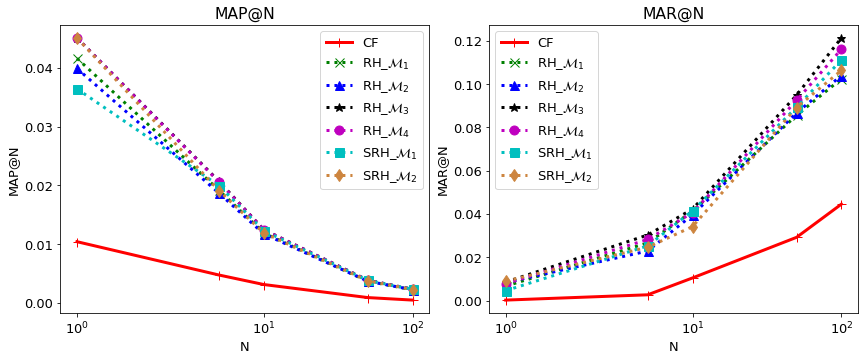

In [ ]:
df = pd.read_csv(df_result_filename)

df['label'] = df['label'].str.replace('0.6sample_5epo_16bit_1r', '')
df['label'] = df['label'].str.replace('RN', 'RH')
df['label'] = df['label'].str.replace('16bit_1r', '')
df['label'] = df['label'].str.replace('8bit_1r', '')
df['label'] = df['label'].str.replace('6bit_1r', '')
df['label'] = df['label'].str.replace('RH_UPTU', 'RH_UPUT')
df['label'] = df['label'].str.replace('RW_UPTU', 'RW_UPUT')

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


ml_baselines_eval.csv


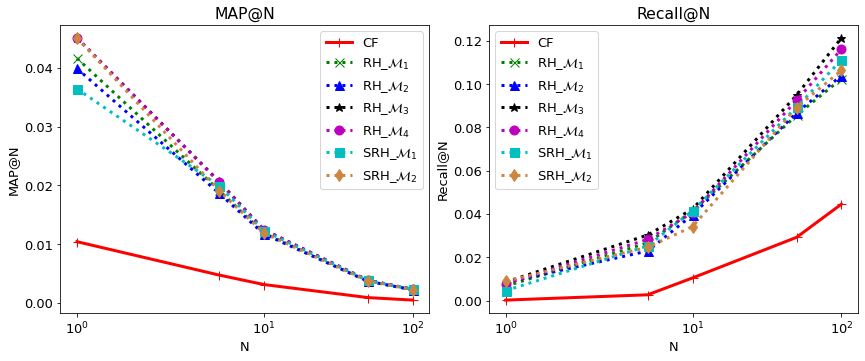

In [ ]:
df = pd.read_csv(df_result_filename)

df['label'] = df['label'].str.replace('0.6sample_5epo_16bit_1r', '')
df['label'] = df['label'].str.replace('RN', 'RH')
df['label'] = df['label'].str.replace('16bit_1r', '')
df['label'] = df['label'].str.replace('8bit_1r', '')
df['label'] = df['label'].str.replace('6bit_1r', '')
df['label'] = df['label'].str.replace('RH_UPTU', 'RH_UPUT')
df['label'] = df['label'].str.replace('RW_UPTU', 'RW_UPUT')

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    

In [ ]:
df

,label,vtype,group,avg_prec_1,avg_prec_5,avg_prec_10,avg_prec_50,avg_prec_100,avg_rec_1,avg_rec_5,...,norm_ep_5,norm_ep_10,norm_ep_50,norm_ep_100,norm_er_1,norm_er_5,norm_er_10,norm_er_50,norm_er_100,Unnamed: 82
0,CF,user-item,all,0.010417,0.004740,0.003118,0.000894,0.000466,0.000278,0.001100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RH RH_UPT__BU,user-item,all,0.041667,0.019178,0.011897,0.003677,0.002219,0.006731,0.014418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RH RH_UPU__BU,user-item,all,0.039931,0.018692,0.011738,0.003681,0.002218,0.008360,0.014671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RH UPTh(T)_BU,user-item,all,0.045139,0.020712,0.012468,0.003848,0.002315,0.008587,0.017658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RH UPUh(U)_BU,user-item,all,0.045139,0.020596,0.012466,0.003837,0.002304,0.007806,0.017304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SRH RW_UPT__BU,user-item,all,0.036458,0.019971,0.012291,0.003812,0.002292,0.004640,0.014178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SRH RW_UPU__BU,user-item,all,0.045139,0.019132,0.011925,0.003758,0.002245,0.009020,0.015226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


ml_baselines_eval.csv


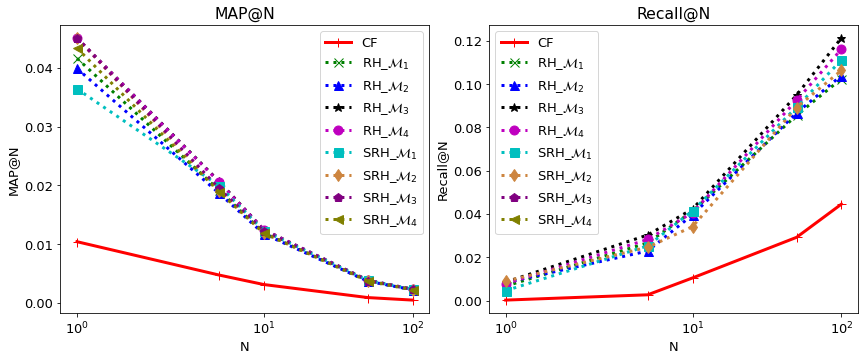

In [ ]:
df = pd.read_csv(df_result_filename)

df['label'] = df['label'].str.replace('0.6sample_5epo_16bit_1r', '')
df['label'] = df['label'].str.replace('RN', 'RH')
df['label'] = df['label'].str.replace('16bit_1r', '')
df['label'] = df['label'].str.replace('8bit_1r', '')
df['label'] = df['label'].str.replace('6bit_1r', '')
df['label'] = df['label'].str.replace('RH_UPTU', 'RH_UPUT')
df['label'] = df['label'].str.replace('RW_UPTU', 'RW_UPUT')

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


ml_baselines_eval.csv


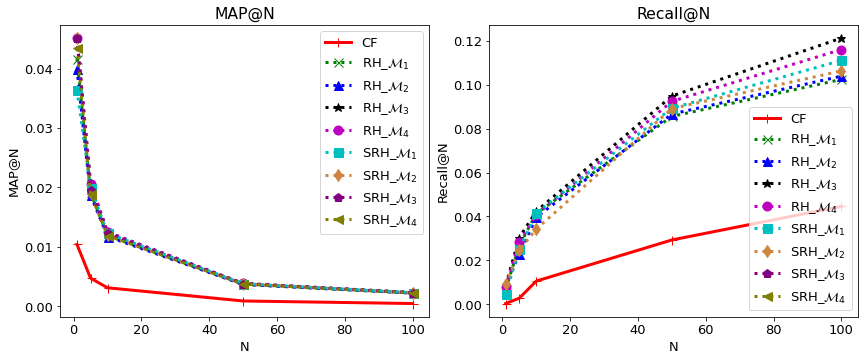

In [ ]:
# Normal X axis